### GWU STAT 4197/STAT 6197

#### Week 7 Part 2 - Working with ODS output

Use the output delivery system to perform the following tasks:

* alter the appearance of the output (style, color, fomt, and so on)
* send SAS tables and graphics to various output destinations, including HTML, PDF, RTF, and PowerPoint and thus create external files from output
    * LISTING 
    * HTML-based (e.g., PDF)
    * Spreadsheet-based
    * RTF-based
    * Printer-Family
* select results objects (output) from PROC step output by using the ODS SELECT statement 
* create a SAS data set that contains any statistic that is produced by a SAS procedure. 
* use the ODS OUTPUT statement to capture a statistic and use it later for futher manipulation.


```
* Run this code chunk using SAS Windowing environment or SAS Studio;
ods html file='C:\Data\myreport.html' style=sasweb;
ods pdf file='C:\Data\myreport.pdf';
ods rtf file='C:\Data\myreport.rtf';
ods csvall file='C:\Data\myexcel.csv';
ods excel file="C:\Data\myreport.xlsx" ;
TITLE 'SASHELP.HEART Data Set';
PROC FREQ data=sashelp.heart;
   tables BP_Status;
 run;
title;
ods  _all_ close;
ods listing;
```

[Faber, VJ. (2008). Using Procedure-Based ODS Data Components in Statistical Reporting. SUGI.](https://support.sas.com/resources/papers/proceedings/proceedings/sugi30/202-30.pdf)

##### Use of procedure-based ODS for 5 commonly used procedures (Faber, 2008)
* PROC UNIVARIATE
* PROC TTEST
* PROC FREQ
* PROC GLM
* PROC LOGISTIC

##### Process of using procedure-based ODS (Faber, 2008)
* Run the PROC leaving the RESULTS window open 
* Identify the names of output objects using ODS (or from the RESULTS window)
* Create SAS data sets from output objects using an ODS output statement
* Manipulate SAS data sets containing output objects for desired output

##### Identify the names of ODS objects from the SAS Log
```
* Run this code chunk using SAS Windowing environment or SAS Studio;
options nocenter nodate nonumber;
ods trace on;
  proc univariate data=SASHELP.CLASS ;    
  var weight;  
run;
ods trace off; 
```

In [ ]:
options nocenter nodate nonumber;
ods trace on;
  proc univariate data=SASHELP.CLASS ;    
  var weight;  
run;
ods trace off;

```
ods trace on;
PROC FREQ data=sashelp.heart;
  tables sex*status /chisq measures relrisk nopercent nocum;
run;
ods trace off;
```
In SAS Windowing environment, the running of the bove code renders the following in the RESULTS windwow.

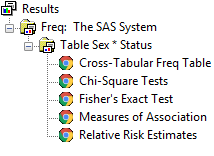

In [13]:
from IPython.display import Image
Image('C:/Data/ODS_Names.png')


In SAS Windowing environment, the running of the bove code renders the following in the Log windwow.

Notice that the RESULTS window above displays the label defined for the output object and not the actual names of objects. The log window shows 
* Name
* Label
* Template 
* Path

```
Output Added:
-------------
Name:       ChiSq
Label:      Chi-Square Tests
Template:   Base.Freq.ChiSq
Path:       Freq.Table1.ChiSq
-------------

Output Added:
-------------
Name:       FishersExact
Label:      Fisher's Exact Test
Template:   Base.Freq.ChisqExactFactoid
Path:       Freq.Table1.FishersExact
-------------

Output Added:
-------------
Name:       Measures
Label:      Measures of Association
Template:   Base.Freq.Measures
Path:       Freq.Table1.Measures
-------------

Output Added:
-------------
Name:       RelativeRisks
Label:      Relative Risk Estimates
Template:   Base.Freq.RelativeRisks
Path:       Freq.Table1.RelativeRisks
-------------
NOTE: There were 5209 observations read from the data set SASHELP.HEART.

```

In [6]:
* The following code is adapted from Faber (2008);
options nocenter nodate nonumber nosource;
ods select none;
PROC FREQ data=sashelp.heart;
 tables sex*status /chisq measures relrisk nopercent nocum;
 ods output CROSSTABFREQS = work.FREQS (keep=table sex status frequency);
 ods output CHISQ = work.PVAL (keep=table statistic prob where=(statistic = "Chi-Square"));
 ods output RELATIVERISKS = work.ODDS(where=(studytype="Case-Control (Odds Ratio)"));
 run;
 data all (drop=sex status statistic);
 merge work.FREQS work.PVAL (drop = statistic) work.ODDS (drop = studytype);
 by table;
  run;
ods select all;
 proc print data=all (firstobs=9 obs=9) noobs label;
  var table frequency prob value LowerCL UpperCL;
  label value='Odds Ratio';
 run;

Table,Frequency Count,Prob,Odds Ratio,95% Lower Confidence Limit,95% Upper Confidence Limit
Table Sex * Status,5209,<.0001,1.9469,1.7384,2.1804


##### Suppressing Output
* NOPRINT option with the PROC
* ODS EXCLUDE statement
* ODS \_ALL_ CLOSE:

[Wicklin, R. (2015). What is the best way to suppress ODS output in SAS?. SAS Blogs](https://blogs.sas.com/content/iml/2015/05/26/suppress-ods.html)

The following is an excerpt from Wicklin (2015).

* If a procedure supports the NOPRINT option AND can create an output data set that contains the statistic that you need, use this combination of options. Check the procedure documentation to see what statistics are supported by the OUTPUT statement, the OUT= option, the OUTEST= option, and so forth.

* If the statistic that you need is available only in an ODS table, or if the procedure does not support the NOPRINT option, use the ODS EXCLUDE ALL statement to suppress output from all open destinations. Use the ODS OUTPUT statement to specify tables that you want to save to SAS data sets. In this situation, I also recommend that you specify ODS GRAPHICS OFF or use the %ODSOff and %ODSOn macros.

* Do not use ODS _ALL_ CLOSE to close all destinations. Although this does prevent future ODS output from appearing, the ODS EXCLUDE technique is more portable and easier to implement, as I discuss in a separate article.

[Wicklin, R. (2015). Five reasons to use ODS EXCLUDE to suppress SAS outpu. SAS Blogs.](https://blogs.sas.com/content/iml/2015/05/28/five-reasons-ods-exclude.html)

[Wickli, R. (2018). What is the best way to suppress ODS output in SAS?](https://blogs.sas.com/content/iml/2015/05/26/suppress-ods.html)

##### LISTING Option with the tracning syntax
This option moves the tracing results from the log to SAS Output windows.

options formchar="|----|+|---+=|-/\<>*";
Formatting characters are used to construct tabular output outlines and dividers for various procedures, such as the CALENDAR, FREQ, and TABULATE procedures. 

```
* Run this code chunk using SAS Windowing environment or SAS Studio;
options nocenter nonumber nodate;
options formchar="|----|+|---+=|-/\<>*";
ods trace on /listing;
PROC FREQ data=sashelp.heart;
 tables sex*status /chisq measures relrisk list nopercent nocum;
  run;
ods trace off;
```

###### Results copied from SAS Output windows
```
The SAS System

The FREQ Procedure

Output Added:
-------------
Name:       CrossTabFreqs
Label:      Cross-Tabular Freq Table
Template:   Base.Freq.CrossTabFreqs
Path:       Freq.Table1.CrossTabFreqs
-------------


Table of Sex by Status

Sex       Status

Frequency|
Row Pct  |
Col Pct  |Alive   |Dead    |  Total
---------+--------+--------+
Female   |   1977 |    896 |   2873
         |  68.81 |  31.19 |
         |  61.44 |  45.00 |
---------+--------+--------+
Male     |   1241 |   1095 |   2336
         |  53.13 |  46.88 |
         |  38.56 |  55.00 |
---------+--------+--------+
Total        3218     1991     5209

The SAS System

The FREQ Procedure

Statistics for Table of Sex by Status

Output Added:
-------------
Name:       ChiSq
Label:      Chi-Square Tests
Template:   Base.Freq.ChiSq
Path:       Freq.Table1.ChiSq
-------------

Statistic                     DF       Value      Prob
------------------------------------------------------
Chi-Square                     1    134.2906    <.0001
Likelihood Ratio Chi-Square    1    134.2973    <.0001
Continuity Adj. Chi-Square     1    133.6270    <.0001
Mantel-Haenszel Chi-Square     1    134.2648    <.0001
Phi Coefficient                       0.1606
Contingency Coefficient               0.1585
Cramer's V                            0.1606

Output Added:
-------------
Name:       FishersExact
Label:      Fisher's Exact Test
Template:   Base.Freq.ChisqExactFactoid
Path:       Freq.Table1.FishersExact
-------------


       Fisher's Exact Test
----------------------------------
Cell (1,1) Frequency (F)      1977
Left-sided Pr <= F          1.0000
Right-sided Pr >= F         <.0001

Table Probability (P)       <.0001
Two-sided Pr <= P           <.0001


The SAS System

The FREQ Procedure

Statistics for Table of Sex by Status

Output Added:
-------------
Name:       Measures
Label:      Measures of Association
Template:   Base.Freq.Measures
Path:       Freq.Table1.Measures
-------------

The SAS System

The FREQ Procedure

Statistics for Table of Sex by Status

Statistic                              Value       ASE
------------------------------------------------------
Gamma                                 0.3213    0.0259
Kendall's Tau-b                       0.1606    0.0138
Stuart's Tau-c                        0.1552    0.0133

Somers' D C|R                         0.1569    0.0135
Somers' D R|C                         0.1643    0.0141

Pearson Correlation                   0.1606    0.0138
Spearman Correlation                  0.1606    0.0138

Lambda Asymmetric C|R                 0.0000    0.0000
Lambda Asymmetric R|C                 0.0852    0.0183
Lambda Symmetric                      0.0460    0.0100

Uncertainty Coefficient C|R           0.0194    0.0033
Uncertainty Coefficient R|C           0.0187    0.0032
Uncertainty Coefficient Symmetric     0.0191    0.0033

Output Added:
-------------
Name:       RelativeRisks
Label:      Relative Risk Estimates
Template:   Base.Freq.RelativeRisks
Path:       Freq.Table1.RelativeRisks
-------------



The SAS System

The FREQ Procedure

Statistics for Table of Sex by Status

                  Odds Ratio and Relative Risks

Statistic                        Value       95% Confidence Limits
------------------------------------------------------------------
Odds Ratio                      1.9469        1.7384        2.1804
Relative Risk (Column 1)        1.2953        1.2379        1.3554
Relative Risk (Column 2)        0.6653        0.6207        0.7131

Sample Size = 5209
```


##### Use case for:

* ODS EXCLUDE ALL
* ODS OUTPUT statement
* ODS SELECT ALL statement

In [2]:
ods exclude all; *to suppress the printed output;
PROC FREQ data=sashelp.heart;
 tables sex*status /chisq measures relrisk nopercent nocum;
 ods output CROSSTABFREQS = work.FREQS (keep=table sex status frequency);
 ods output CHISQ = work.PVAL (keep=table statistic value df prob where=(statistic = "Chi-Square"));
 ods output RELATIVERISKS = work.ODDS(where=(studytype="Case-Control (Odds Ratio)"));
 run;
ods select all; *restore the default printed output;
proc print data=work.FREQS; run;
proc print data=work.PVAL; run;
proc print data=work.odds; run;